# Background image in cartopy

In [1]:
import sys

In [2]:
import cartopy

import matplotlib.pyplot as plt
%matplotlib inline

The cartopy is a great tool for creating maps in many ways more advanced than the usual workhorse for map creation in pyhton - the Basemap module. However I really missed one nice feature that Basemap have - easy way to add background image to the map. With the Basemap instance one can just write `m.etopo()` and get a relativelly nice map of the ETOPO topography overplayed or `m.bluemarble()` for the NASA's "Blue marble" image of the Earth.

In the cartopy there is similar feature `stock_img()` but there is only one available image. In the newest version of cartopy developers add a `background_img()` method, that allows to add background images in a more convenient way. I will show you how to setup cartopy to use custom background images.

Let's setup cartopy for use of the custom background. You have to have a folder that contain background images and a `json` file that describes images (see explanation below). Then you have to create environment variable that contains the path to the folder:

In [3]:
import os

In [4]:
os.environ['CARTOPY_USER_BACKGROUNDS'] = '/mnt/efs/cartopy/bg'

You can get a lot of nice map backgrounds from this NASA website https://neo.sci.gsfc.nasa.gov/. The json file that you have to put in to the background folder should be called `images.json` and look like this:

As you can see one can specify different "resolutions" for the same image name which will just point to different files.

/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


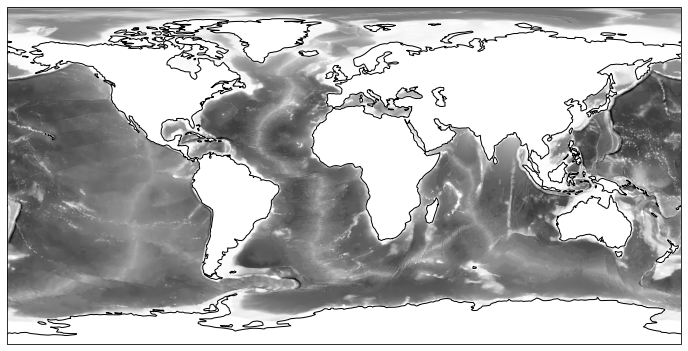

In [5]:
plt.figure(figsize=(13,6.2))

#ax = plt.axes(projection=cartopy.crs.Robinson(central_longitude=-159))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.background_img(name='BTg', resolution='high')
ax.coastlines(resolution='110m',linewidth=1.0)
#ax.stock_img()

plt.show()

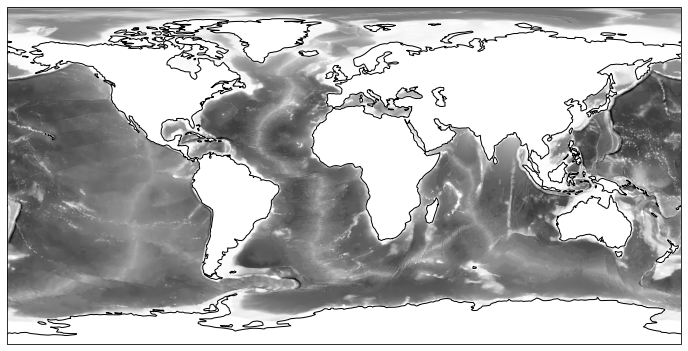

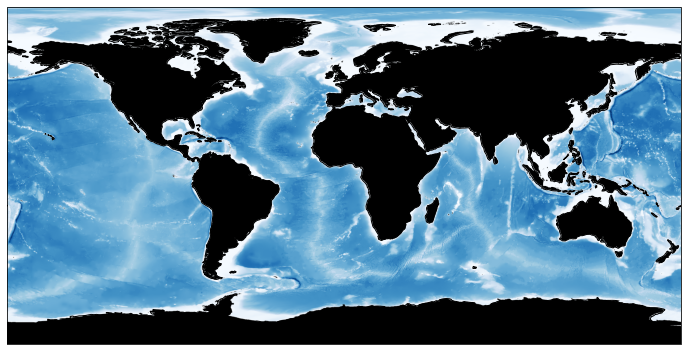

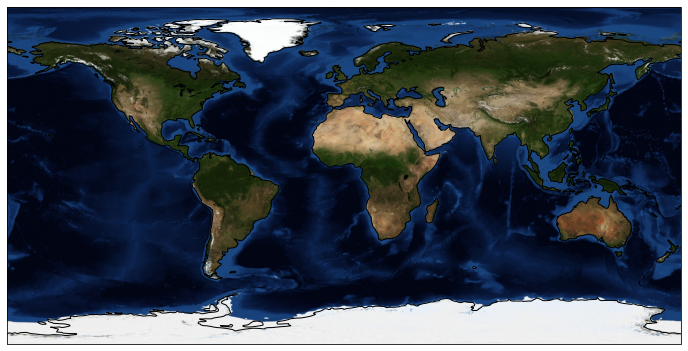

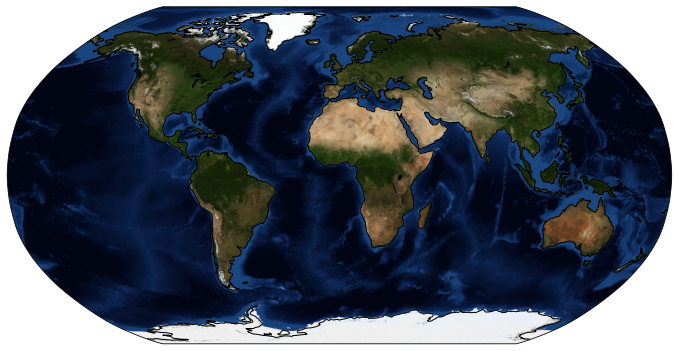

In [9]:
plt.figure(figsize=(13,6.2))

ax = plt.axes(projection=cartopy.crs.Robinson(central_longitude=0))
ax.background_img(name='BM', resolution='high')
ax.coastlines(resolution='110m',linewidth=1.0)
#ax.stock_img()

plt.show()

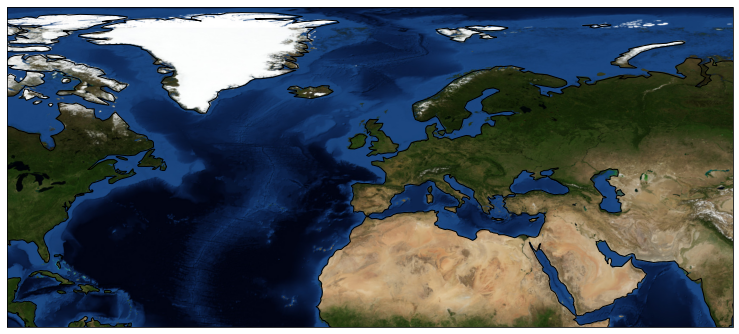

In [6]:
plt.figure(figsize=(13,6.2))

#ax = plt.axes(projection=cartopy.crs.Robinson(central_longitude=-159))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-90, 80, 10, 85], crs=cartopy.crs.PlateCarree())
ax.background_img(name='BM', resolution='high')
ax.coastlines(resolution='110m',linewidth=1.0)
#ax.stock_img()

plt.show()

In [ ]:
plt.figure(figsize=(13,6.2))

#ax = plt.axes(projection=cartopy.crs.Robinson(central_longitude=-159))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-90, 80, 10, 85], crs=cartopy.crs.PlateCarree())
ax.background_img(name='BM', resolution='high')
ax.coastlines(resolution='110m',linewidth=1.0)
#ax.stock_img()

plt.show()

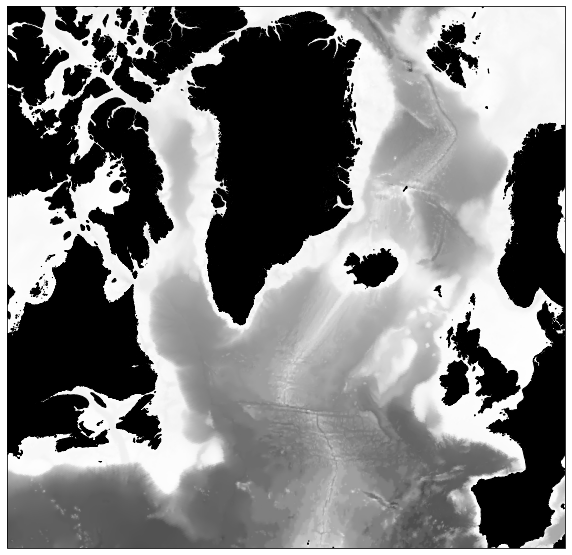

In [13]:
fig = plt.figure(figsize=[10, 12])

ax = plt.axes(projection=cartopy.crs.LambertConformal(central_longitude=-30.0,central_latitude=50.0))
ax.set_extent([-68, 0, 35, 83], cartopy.crs.Geodetic())
ax.background_img(name='BTg', resolution='high')
ax.add_feature(cartopy.feature.GSHHSFeature(scale = 'intermediate', edgecolor='k',facecolor='k'))

plt.savefig('/mnt/efs/figure.png')
plt.savefig('/mnt/efs/figure.pdf')
plt.savefig('/mnt/efs/figure.eps')
plt.show()

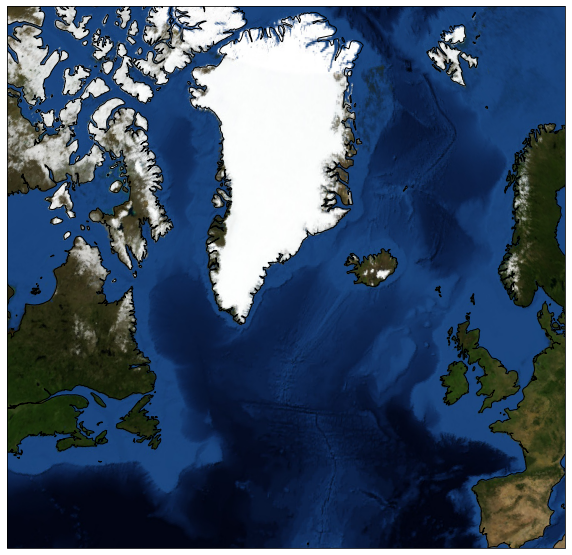

In [33]:
import numpy as np

import matplotlib.patches as mpatch
import matplotlib.ticker as mticker

In [37]:
style = "Simple, tail_width=1, head_width=40, head_length=80"
kw = dict(arrowstyle=style, color="k")

In [47]:
import shapely.geometry as sgeom

In [49]:
lons = [-40.1, -40.7, -41.2, -41.5, -41.9, -42.7, -43.4, -44. , -44.6,
       -45.1, -45.3, -46.3, -47. , -47.6, -48.3, -49. , -49.7, -50.3,
       -50.9, -51.7, -52.7, -53.6, -54.2, -54.6, -54.6, -54.6, -54.6,
       -54.6, -54.1, -53.6, -53. , -52. , -50.3, -47.9]

lats = [43.1, 43.4, 43.8, 44.5, 45.4, 46. , 46.1, 46.2, 46.2, 46. , 45.9,
       45.4, 45.1, 44.9, 44.6, 44.4, 44.4, 44.5, 44.8, 45.2, 45.7, 46.3,
       47.2, 48.2, 49.3, 49.5, 50.2, 51.1, 52.6, 54.1, 55.6, 57. , 58.6,
       60.1]

In [60]:
# turn the lons and lats into a shapely LineString
track = sgeom.LineString(zip(lons, lats))

# buffer the linestring by two degrees (note: this is a non-physical distance)
track_buffer = track.buffer(2)

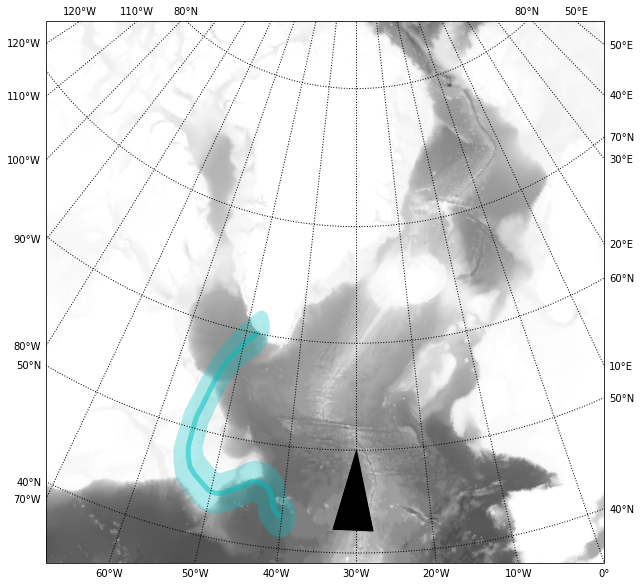

In [61]:
fig = plt.figure(figsize=[10, 12])

ax = plt.axes(projection=cartopy.crs.LambertConformal(central_longitude=-30.0,central_latitude=50.0))
ax.set_extent([-68, 0, 35, 83], cartopy.crs.Geodetic())
ax.background_img(name='BTg', resolution='high')
#ax.add_feature(cartopy.feature.GSHHSFeature(scale = 'intermediate', edgecolor='k',facecolor='k'))
ax.add_patch(mpatch.FancyArrowPatch((-60, 40), (-20, 60), connectionstyle='arc3,rad=.9', **kw))
gl = ax.gridlines(cartopy.crs.PlateCarree(), draw_labels=True, linewidth=1.0, linestyle=':', color='k',
                  auto_inline=False)
gl.xlocator = mticker.FixedLocator(np.arange(-120,60,10))
gl.ylocator = mticker.FixedLocator(np.arange(0,100,10))
gl.rotate_labels = False
gl.top_labels = False

ax.add_geometries([track_buffer], cartopy.crs.PlateCarree(), facecolor='c', alpha=0.3)
ax.add_geometries([track], cartopy.crs.PlateCarree(), facecolor='none', edgecolor='c', linewidth=5, alpha=0.5)

plt.show()

In [62]:
import matplotlib.path as mpath

In [111]:
# Construct a star in longitudes and latitudes.
boundary_path = mpath.Path.unit_circle()
boundary_path = mpath.Path(boundary_path.vertices.copy() * 80,
                           boundary_path.codes.copy())

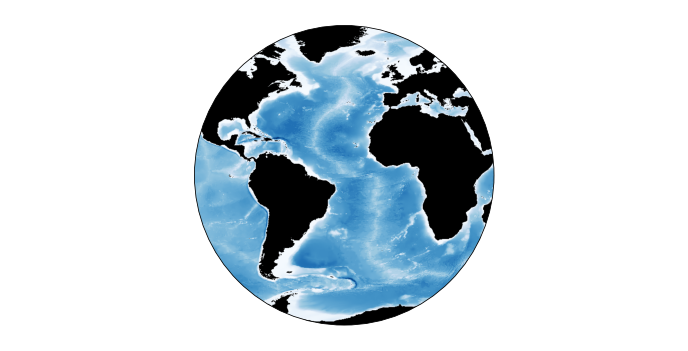

In [99]:
plt.figure(figsize=(13,6.2))

ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=-30))
#ax.set_extent([-150, 10, 30, 85], crs=cartopy.crs.PlateCarree())
ax.background_img(name='BTc', resolution='high')

# Set the boundary with defined path 
ax.set_boundary(boundary_path, transform=cartopy.crs.PlateCarree(central_longitude=-30))
plt.show()

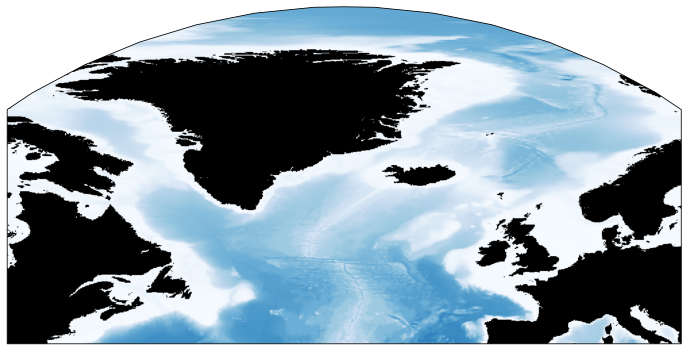

In [120]:
plt.figure(figsize=(13,6.2))

ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=-30))
ax.set_extent([-80, 20, 40, 90], crs=cartopy.crs.PlateCarree())
ax.background_img(name='BTc', resolution='high')

# Set the boundary with defined path 
ax.set_boundary(boundary_path, transform=cartopy.crs.PlateCarree(central_longitude=-30))
plt.show()

In [119]:
# Construct a star in longitudes and latitudes.
boundary_path = mpath.Path.unit_circle()
boundary_path = mpath.Path(boundary_path.vertices.copy() * 90,
                           boundary_path.codes.copy())

In [121]:
boundary_path

Path(array([[  0.        , -90.        ],
       [ 23.868279  , -90.        ],
       [ 46.76218837, -80.51703224],
       [ 63.63961031, -63.63961031],
       [ 80.51703224, -46.76218837],
       [ 90.        , -23.868279  ],
       [ 90.        ,   0.        ],
       [ 90.        ,  23.868279  ],
       [ 80.51703224,  46.76218837],
       [ 63.63961031,  63.63961031],
       [ 46.76218837,  80.51703224],
       [ 23.868279  ,  90.        ],
       [  0.        ,  90.        ],
       [-23.868279  ,  90.        ],
       [-46.76218837,  80.51703224],
       [-63.63961031,  63.63961031],
       [-80.51703224,  46.76218837],
       [-90.        ,  23.868279  ],
       [-90.        ,   0.        ],
       [-90.        , -23.868279  ],
       [-80.51703224, -46.76218837],
       [-63.63961031, -63.63961031],
       [-46.76218837, -80.51703224],
       [-23.868279  , -90.        ],
       [  0.        , -90.        ],
       [  0.        , -90.        ]]), array([ 1,  4,  4,  4,  4,  4, 

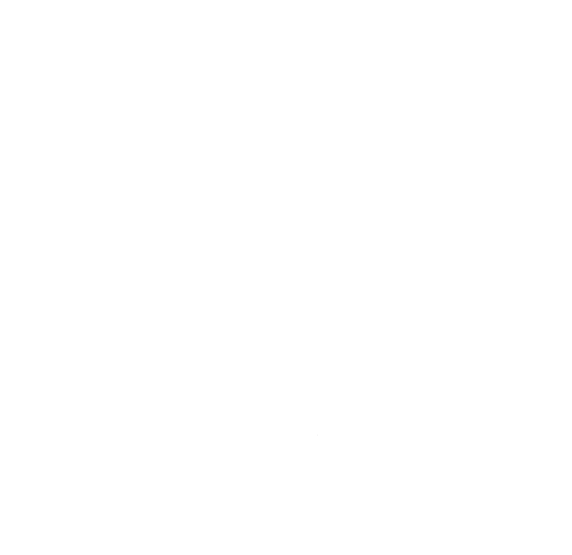

In [107]:
fig = plt.figure(figsize=[10, 12])

ax = plt.axes(projection=cartopy.crs.LambertConformal(central_longitude=-30.0,central_latitude=50.0))
ax.set_extent([-68, 0, 35, 83], cartopy.crs.Geodetic())
ax.background_img(name='BTc', resolution='high')
ax.set_boundary(boundary_path, transform=cartopy.crs.LambertConformal(central_longitude=-30.0,central_latitude=50.0))

plt.show()